<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-necessary-libraries/packages" data-toc-modified-id="Import-necessary-libraries/packages-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import necessary libraries/packages</a></span><ul class="toc-item"><li><span><a href="#Libraries/packages" data-toc-modified-id="Libraries/packages-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Libraries/packages</a></span></li><li><span><a href="#User-defined-functions" data-toc-modified-id="User-defined-functions-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>User-defined functions</a></span></li></ul></li><li><span><a href="#Import-data" data-toc-modified-id="Import-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Import data</a></span></li><li><span><a href="#Data-understanding---EDA" data-toc-modified-id="Data-understanding---EDA-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data understanding - EDA</a></span><ul class="toc-item"><li><span><a href="#Descriptive-statistics" data-toc-modified-id="Descriptive-statistics-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Descriptive statistics</a></span></li><li><span><a href="#Data-visualizations" data-toc-modified-id="Data-visualizations-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Data visualizations</a></span><ul class="toc-item"><li><span><a href="#Exploring-the-target" data-toc-modified-id="Exploring-the-target-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Exploring the target</a></span></li><li><span><a href="#Missing-data-in-the-feature-set" data-toc-modified-id="Missing-data-in-the-feature-set-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Missing data in the feature set</a></span></li><li><span><a href="#Feature-dists---training-vs-test" data-toc-modified-id="Feature-dists---training-vs-test-3.2.3"><span class="toc-item-num">3.2.3&nbsp;&nbsp;</span>Feature dists - training vs test</a></span></li><li><span><a href="#Feature-dists-for-target-classes" data-toc-modified-id="Feature-dists-for-target-classes-3.2.4"><span class="toc-item-num">3.2.4&nbsp;&nbsp;</span>Feature dists for target classes</a></span></li></ul></li></ul></li></ul></div>

## Import necessary libraries/packages

### Libraries/packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import aictools.core as aic
metrics = ['name', 'type', 'hist', 'min', 'max', 'mean', 'median', 'missing', 'unique']
import seaborn as sns
sns.set()

%matplotlib inline

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
# Set max number of columns to show when listing dataframe (e.g. by .head())
maxcols_tovis = 50
if pd.get_option("display.max_columns")<maxcols_tovis:
    pd.set_option("display.max_columns", maxcols_tovis)

### User-defined functions

In [124]:
def identify_category_columns(df,category_limit=100):
    category_cols = []
    for col in df.columns:
        if df[col].nunique()<=category_limit:
            category_cols.append(col)
    return category_cols

def plot_barcharts_for_columns(df, cols, df2=None, maxvals=15, minvals=1, 
                               normalized=False, rowheight=5, ncols=2, 
                               labels=['A','B'], colors=['blue','green']):
    ''' Set some figure parameters'''
    nplots = len(cols)
    ncols = int(ncols)
    nrows = int(np.ceil(len(cols)/ncols))
        
    fig, ax = plt.subplots(figsize=(20,rowheight*nrows))
    i = 1
    for col in cols:  
        ''' Count number of occurences for each category per column in main dataset '''
        temp_data = df[col].dropna()
        missing_perc = 100*(1-len(temp_data)/len(df[col]))        
        counts_1 = temp_data.value_counts().sort_values()
        if len(counts_1)>=minvals:
            if normalized==True:
                counts_1= counts_1/(sum(counts_1)*1.0)
            if len(counts_1)>maxvals:
                counts_1 = counts_1[-maxvals:]            
                    
            y_pos = np.array(list(counts_1.index))
            
            ''' Count number of occurences for each category per column in optional additional dataset '''
            if type(df2) is pd.core.frame.DataFrame and col in df2.columns:
                temp_data2 = df2[col].dropna()
                counts_2 = temp_data2.value_counts().sort_values()
                if normalized==True:
                    counts_2 = counts_2/(sum(counts_2)*1.0)
                counts_2 = counts_2[counts_1.index].fillna(0) # Fill NaN with 0 to ensure all categories are kept
                if len(counts_2)>maxvals:
                    counts_2 = counts_2[-maxvals:]
                y_skew = 0.15
            else:
                y_skew = 0
            
            ''' Plot bar charts '''
            ax = plt.subplot(nrows,ncols,i)
            ax.barh(np.arange(1,len(counts_1)+1)+y_skew, counts_1, 
                    align='center', height=0.3, label=labels[0], color=colors[0])
            if type(df2) is pd.core.frame.DataFrame and col in df2.columns:
                ax.barh(np.arange(1,len(counts_2)+1)-y_skew, counts_2, 
                        align='center', height=0.3, label=labels[1], color=colors[1])

            ax.set_yticks(np.arange(1,len(counts_1)+1))
            ax.set_yticklabels(y_pos)
            ax.set_title('%s \n(%.2f%s missing)'%(col,missing_perc,'%'), fontsize=16)
            ax.set_ylabel('')
            ax.legend(fontsize=14)
            aic.jupyter.ax_properties(ax)
            i += 1
    plt.tight_layout(pad=0.1, w_pad=0.5, h_pad=3.0)
    
def plot_histograms_for_columns(df,cols,rowheight=5, df2=None, labels=['A','B']):
    nrows, ncols = len(cols), 2
    nplots = len(cols)
    fig, ax = plt.subplots(figsize=(20,rowheight*nrows))
    i = 1
    for col in cols:
        temp_data = df[col].dropna()        
        missing_perc = 100*(1-len(temp_data)/len(df[col]))
        ax = plt.subplot(nrows,ncols,i)
        ax.hist(temp_data, bins=50, alpha=0.5, label=labels[0], density=True)
        if type(df2) is pd.core.frame.DataFrame:
            temp_data2 = df2[col].dropna()
            ax.hist(temp_data2, bins=50, alpha=0.4, label=labels[1], density=True)
        ax.set_title('%s \n(%.2f%s missing)'%(col,missing_perc,'%'), fontsize=20)
        ax.set_ylabel('')
        ax.legend(fontsize=14)
        aic.jupyter.ax_properties(ax)
        
        i += 1
        ax = plt.subplot(nrows,ncols,i)
        ax.hist(np.log(temp_data[temp_data>0]), bins=50, alpha=0.5, label=labels[0], density=True)
        if type(df2) is pd.core.frame.DataFrame:
            ax.hist(np.log(temp_data2[temp_data2>0]), bins=50, alpha=0.4, label=labels[1], density=True)
        missing_perc = 100*(1-sum(temp_data>0)/len(df[col]))
        ax.set_title('log of %s \n(%.2f%s missing or <=0)'%(col,missing_perc,'%'), fontsize=20)
        ax.set_ylabel('')
        ax.legend(fontsize=14)
        aic.jupyter.ax_properties(ax)
        i +=1
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=3.0)

## Import data

In [19]:
# Read in training data from file
FILENAME = 'application_train.csv'
df_train = pd.read_csv('../data/{}'.format(FILENAME))

# Read in test data from file
FILENAME = 'application_test.csv'
df_test = pd.read_csv('../data/{}'.format(FILENAME))

In [18]:
# Read metadata - column names and descriptions
FILENAME = 'HomeCredit_columns_description.csv'
column_descriptions = pd.read_csv('../data/{}'.format(FILENAME)) #, encoding='utf_32')

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x85 in position 59: invalid start byte

![dataset connections](https://storage.googleapis.com/kaggle-media/competitions/home-credit/home_credit.png)

## Data understanding - EDA

### Descriptive statistics

In [9]:
df_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,...,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,NaN,1,1,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
aic.jupyter.display_summary_statistics(df_train, metrics=metrics)

VBox(children=(HTML(value='<h4><b>Data summary:</b></h4> <b>Table size:</b>'), HBox(children=(Label(value='Rows:', layout=Layout(width='100px')), HTML(value='307511', layout=Layout(border='1px solid #9E9E9E', padding='1px 0px 0px 5px', width='90px')))), HBox(children=(Label(value='Columns:', layout=Layout(width='100px')), HTML(value='122', layout=Layout(border='1px solid #9E9E9E', padding='1px 0px 0px 5px', width='90px')))), HBox(children=(Label(value='Memory usage:', layout=Layout(width='100px')), HTML(value='540.21 MB', layout=Layout(border='1px solid #9E9E9E', padding='1px 0px 0px 5px', width='90px')))), HBox(children=(Label(value='Total missing:', layout=Layout(width='100px')), HTML(value='9152465', layout=Layout(border='1px solid #9E9E9E', padding='1px 0px 0px 5px', width='90px')))), HBox(children=(Label(value='Total missing %:', layout=Layout(width='100px')), HTML(value='24.40%', layout=Layout(border='1px solid #9E9E9E', padding='1px 0px 0px 5px', width='90px'))))))

HBox(children=(HTML(value='<b>Variable name</b>', layout=Layout(width='224px')), HTML(value='<b>Type</b>', layout=Layout(width='90px')), HTML(value='<b>Histogram</b>', layout=Layout(width='100.0px')), HTML(value='<b>Min</b>', layout=Layout(width='90px')), HTML(value='<b>Max</b>', layout=Layout(width='90px')), HTML(value='<b>Mean</b>', layout=Layout(width='90px')), HTML(value='<b>Median</b>', layout=Layout(width='90px')), HTML(value='<b>Missing</b>', layout=Layout(width='90px')), HTML(value='<b>Unique values</b>', layout=Layout(width='90px'))))

VBox(children=(HBox(children=(HTML(value='<h6>SK_ID_CURR</h6>', layout=Layout(width='224px')), HTML(value='<h5><font color=green>int64</font></h5>', layout=Layout(width='90px')), Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x00d\x00\x00\x00\x1e\x08\x06\x00\x00\x00\xda[\xbb\xf3\x00\x00\x00\x04sBIT\x08\x08\x08\x08|\x08d\x88\x00\x00\x00\tpHYs\x00\x00\x0b\x12\x00\x00\x0b\x12\x01\xd2\xdd~\xfc\x00\x00\x009tEXtSoftware\x00matplotlib version 2.1.2, http://matplotlib.org/5\x0b\xf9\xc8\x00\x00\x00\x7fIDATh\x81\xed\xda\xb1\t\xc3@\x10\x00A\xbdp{\xc6\xc5\xa8\x0e\x17c\\\xe0;V*\t\xbc\x88\x99\xfc\x9e\x83\xe5\xb2\x1fs\xce\xb9\x90\xb1\xfe{\x01\xf6\x04\x89\x11$F\x90\x98\xc7\xd9\x07\x9e\xdb\xe7\x8a=n\xe7\xfb~\x1d\x9as!1\x82\xc4\x08\x12#H\x8c 1\x82\xc4\x08\x12#H\x8c 1\x82\xc4\x08\x12#H\x8c 1\x82\xc4\x08\x12#H\x8c 1\x82\xc4\x08\x12#H\xcc\xf0s\xb1\xc5\x85\xc4\x08\x12#H\xcc\x0f+\xf7\x0b5\xcdfm\x0e\x00\x00\x00\x00IEND\xaeB`\x82', height='30.0', layout=Layout(border='1px solid #9E9E9E'), width='100.0px'), HTML(value='100002', layout=Layout(border='1px solid #9E9E9E', padding='1px 0px 0px 5px', width='90px')), HTML(value='456255', layout=Layout(border='1px solid #9E9E9E', padding='1px 0px 0px 5px', width='90px')), HTML(value='278180.519', layout=Layout(border='1px solid #9E9E9E', padding='1px 0px 0px 5px', width='90px')), HTML(value='278202', layout=Layout(border='1px solid #9E9E9E', padding='1px 0px 0px 5px', width='90px')), Button(description='0', disabled=True, layout=Layout(width='90px'), style=ButtonStyle(button_color='#aaffaa')), Button(description='307511', disabled=True, layout=Layout(width='90px'), style=ButtonStyle(button_color='#aaffaa')))), HBox(children=(HTML(value='<h6>TARGET</h6>', layout=Layout(width='224px')), HTML(value='<h5><font color=green>int64</font></h5>', layout=Layout(width='90px')), Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x00d\x00\x00\x00\x1e\x08\x06\x00\x00\x00\xda[\xbb\xf3\x00\x00\x00\x04sBIT\x08\x08\x08\x08|\x08d\x88\x00\x00\x00\tpHYs\x00\x00\x0b\x12\x00\x00\x0b\x12\x01\xd2\xdd~\xfc\x00\x00\x009tEXtSoftware\x00matplotlib version 2.1.2, http://matplotlib.org/5\x0b\xf9\xc8\x00\x00\x00\x86IDATh\x81\xed\xda\xb1\t\xc30\x10@\xd18x=\x93a2G\x86\t\x1eP\xaeS\xa4\x12\xc6\x1f\xfc^+8\x04\x9f\xab\xa4e\x8c1\x1ed<\xaf\xbe\x00\xbf\x04\x89\x11$F\x90\x98uv\xc0\xf6\xfe\xfe=\xdb?\xaf\xd9\xf1\xb7cCb\x04\x89\x11$F\x90\x18Ab\x04\x89\x11$F\x90\x18Ab\x04\x89\x11$F\x90\x18Ab\x04\x89\x11$F\x90\x18Ab\x04\x89\x99~\xc2\xbd\xb33\x9e\xafmH\xcc\xe2\xe7b\x8b\r\x89\x11$F\x90\x98\x03\x15i\x0e7\x15.\xf0\xd1\x00\x00\x00\x00IEND\xaeB`\x82', height='30.0', layout=Layout(border='1px solid #9E9E9E'), width='100.0px'), HTML(value='0', layout=Layout(border='1px solid #9E9E9E', padding='1px 0px 0px 5px', width='90px')), HTML(value='1', layout=Layout(border='1px solid #9E9E9E', padding='1px 0px 0px 5px', width='90px')), HTML(value='0.081', layout=Layout(border='1px solid #9E9E9E', padding='1px 0px 0px 5px', width='90px')), HTML(value='0', layout=Layout(border='1px solid #9E9E9E', padding='1px 0px 0px 5px', width='90px')), Button(description='0', disabled=True, layout=Layout(width='90px'), style=ButtonStyle(button_color='#aaffaa')), Button(description='2', disabled=True, layout=Layout(width='90px'), style=ButtonStyle(button_color='#ffd4aa')))), HBox(children=(HTML(value='<h6>NAME_CONTRACT_TYPE</h6>', layout=Layout(width='224px')), HTML(value='<h5><font color=red>object</font></h5>', layout=Layout(width='90px')), Image(value=b'123123', height='30.0', layout=Layout(border='1px solid #9E9E9E'), width='100.0px'), HTML(value='nan', layout=Layout(border='1px solid #9E9E9E', padding='1px 0px 0px 5px', width='90px')), HTML(value='nan', layout=Layout(border='1px solid #9E9E9E', padding='1px 0px 0px 5px', width='90px')), HTML(value='nan', layout=Layout(border='1px solid #9E9E9E', padding='1px 0px 0px 5px', width='90px')), HTML(value='nan', layout=Layout(border='1px solid #9E9E9E', padding='1px 0px 0px 5px', width='90px')), Button(description='0', dis

### Data visualizations

#### Exploring the target
The target variable 'TARGET' is a binary [0,1] variable indicating if the loan (each row is one loan) was succesfully payed back (TARGET=0) or not/defaulted (TARGET=1)

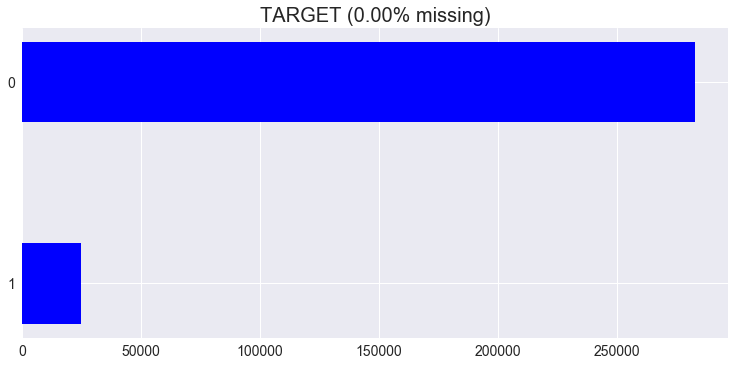

In [11]:
plot_barcharts_for_columns(df_train, ['TARGET'])

In [12]:
ratioDefaults = sum(df_train['TARGET']==1)/(len(df_train)*1.0)
print('Ratio of \n Non-defaults: %.5f \n Defaults: %.5f'%(1-ratioDefaults,ratioDefaults))

Ratio of 
 Non-defaults: 0.91927 
 Defaults: 0.08073


As seen this is a case of an imbalanced dataset, i.e. where there is one majority class (TARGET=0).
An issue with such problems is that a dummy clasifier always predicting the majority class (here TARGET=0) will have high accuracy, here 91,93%. Hence one must be careful in the choice of performance metric, as e.g. accuracy is a poor measure.

#### Missing data in the feature set

Text(0.5,0,'COLUMNS')

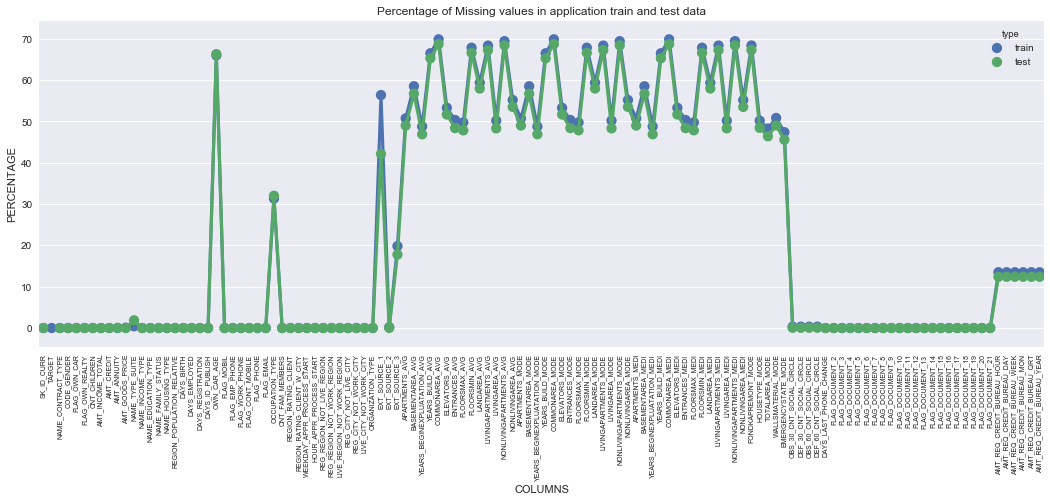

In [23]:
fig = plt.figure(figsize=(18,6))
miss_train = pd.DataFrame((df_train.isnull().sum())*100/df_train.shape[0]).reset_index()
miss_test = pd.DataFrame((df_test.isnull().sum())*100/df_test.shape[0]).reset_index()
miss_train["type"] = "train"
miss_test["type"]  =  "test"
missing = pd.concat([miss_train,miss_test],axis=0)
ax = sns.pointplot("index",0,data=missing,hue="type")
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values in application train and test data")
plt.ylabel("PERCENTAGE")
plt.xlabel("COLUMNS")
#ax.set_facecolor("k")
#fig.set_facecolor("lightgrey")

#### Feature dists - training vs test
Histograms (continuous/numerical features) and bar charts (categorical features) for single features in training and test dataset - looing at individual (univariate) distributions

C:\Users\DAVOL\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:838: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


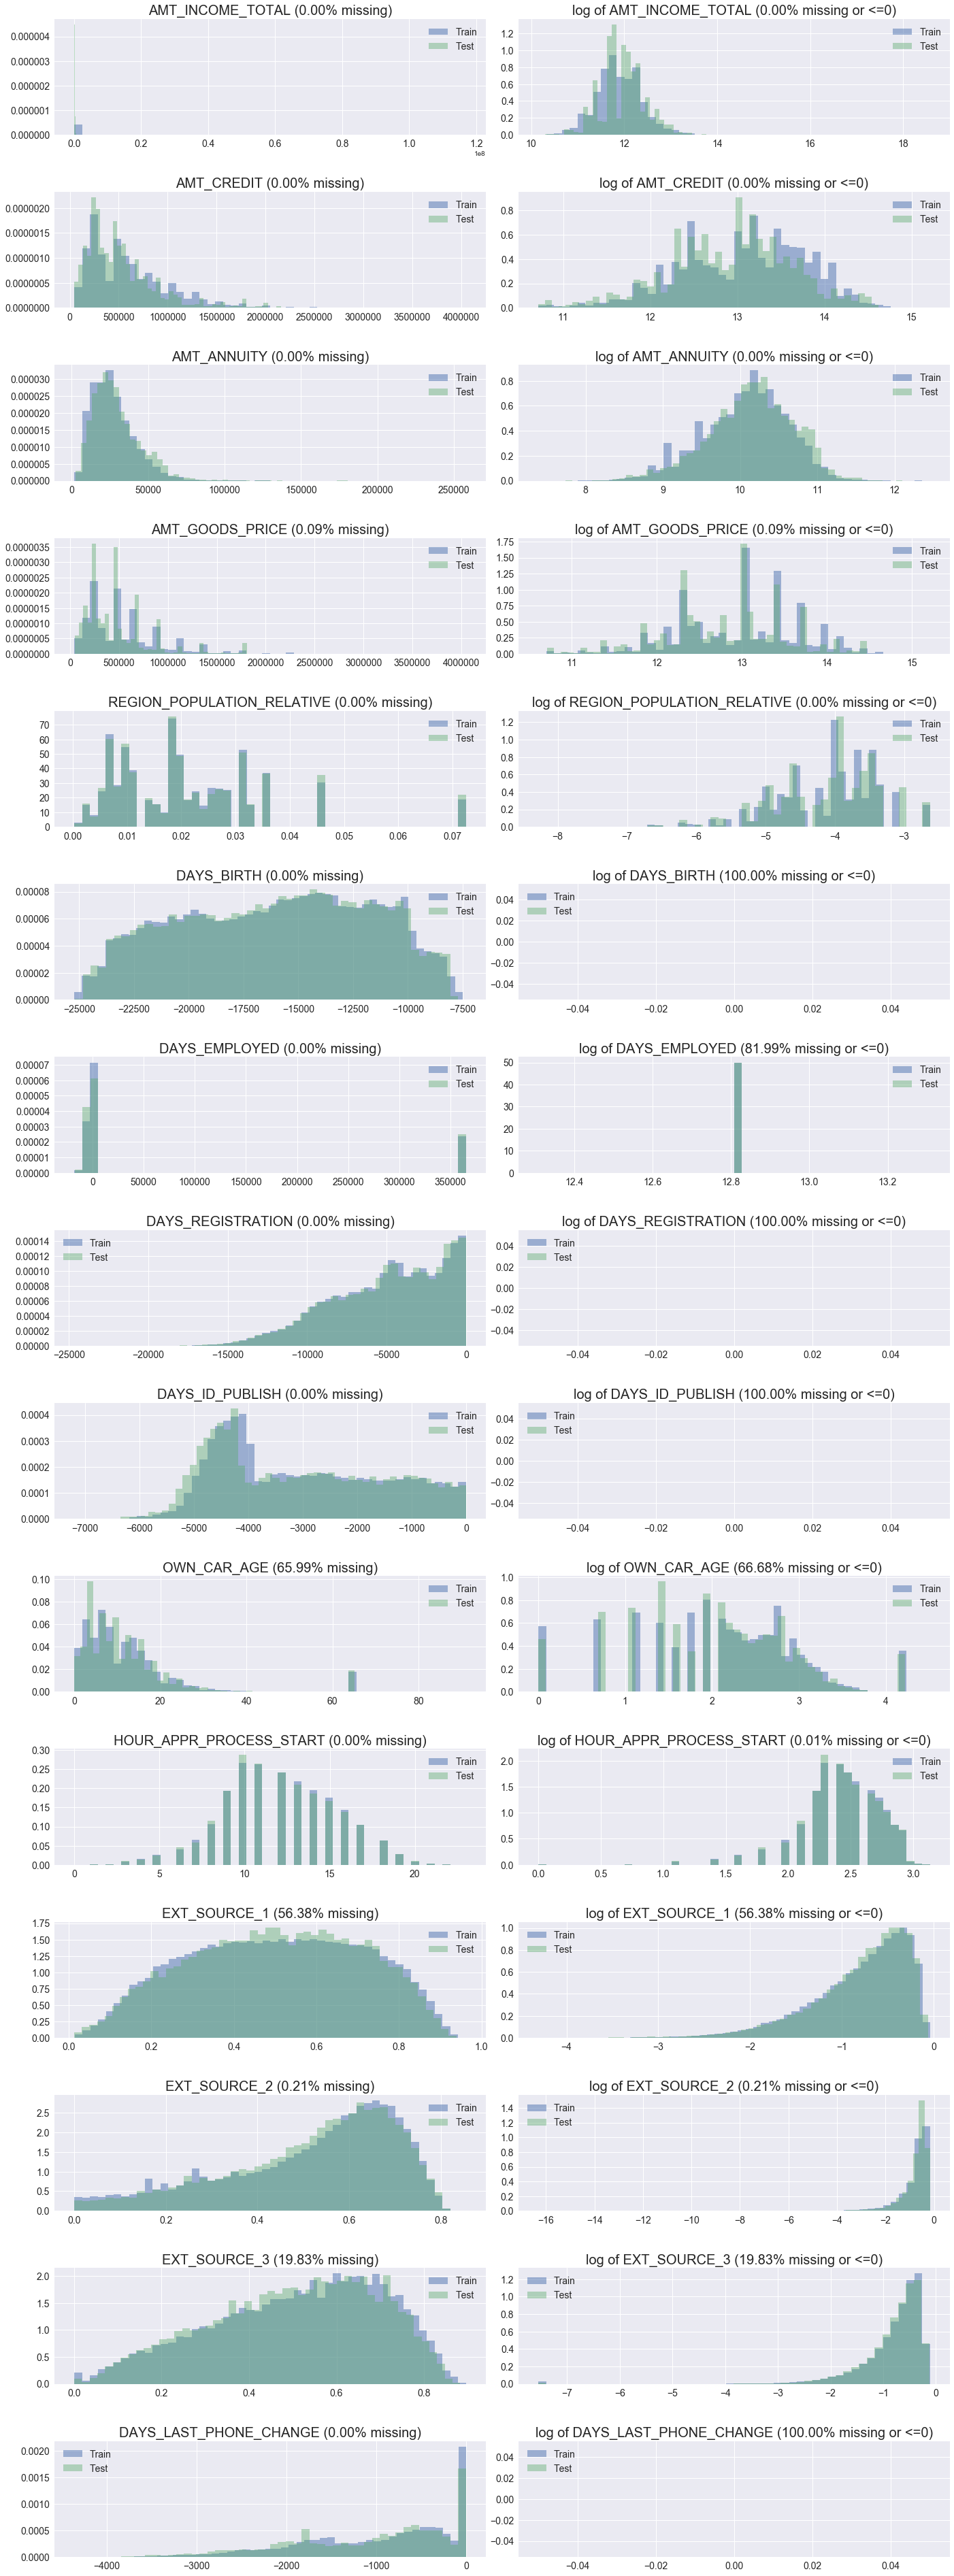

In [45]:
continuous_columns = ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE',
                     'REGION_POPULATION_RELATIVE','DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION',
                     'DAYS_ID_PUBLISH','OWN_CAR_AGE','HOUR_APPR_PROCESS_START',
                     'EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','DAYS_LAST_PHONE_CHANGE']
plot_histograms_for_columns(df_train, df2=df_test, cols=continuous_columns, rowheight=3.5, labels=['Train','Test'])

C:\Users\DAVOL\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\series.py:696: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


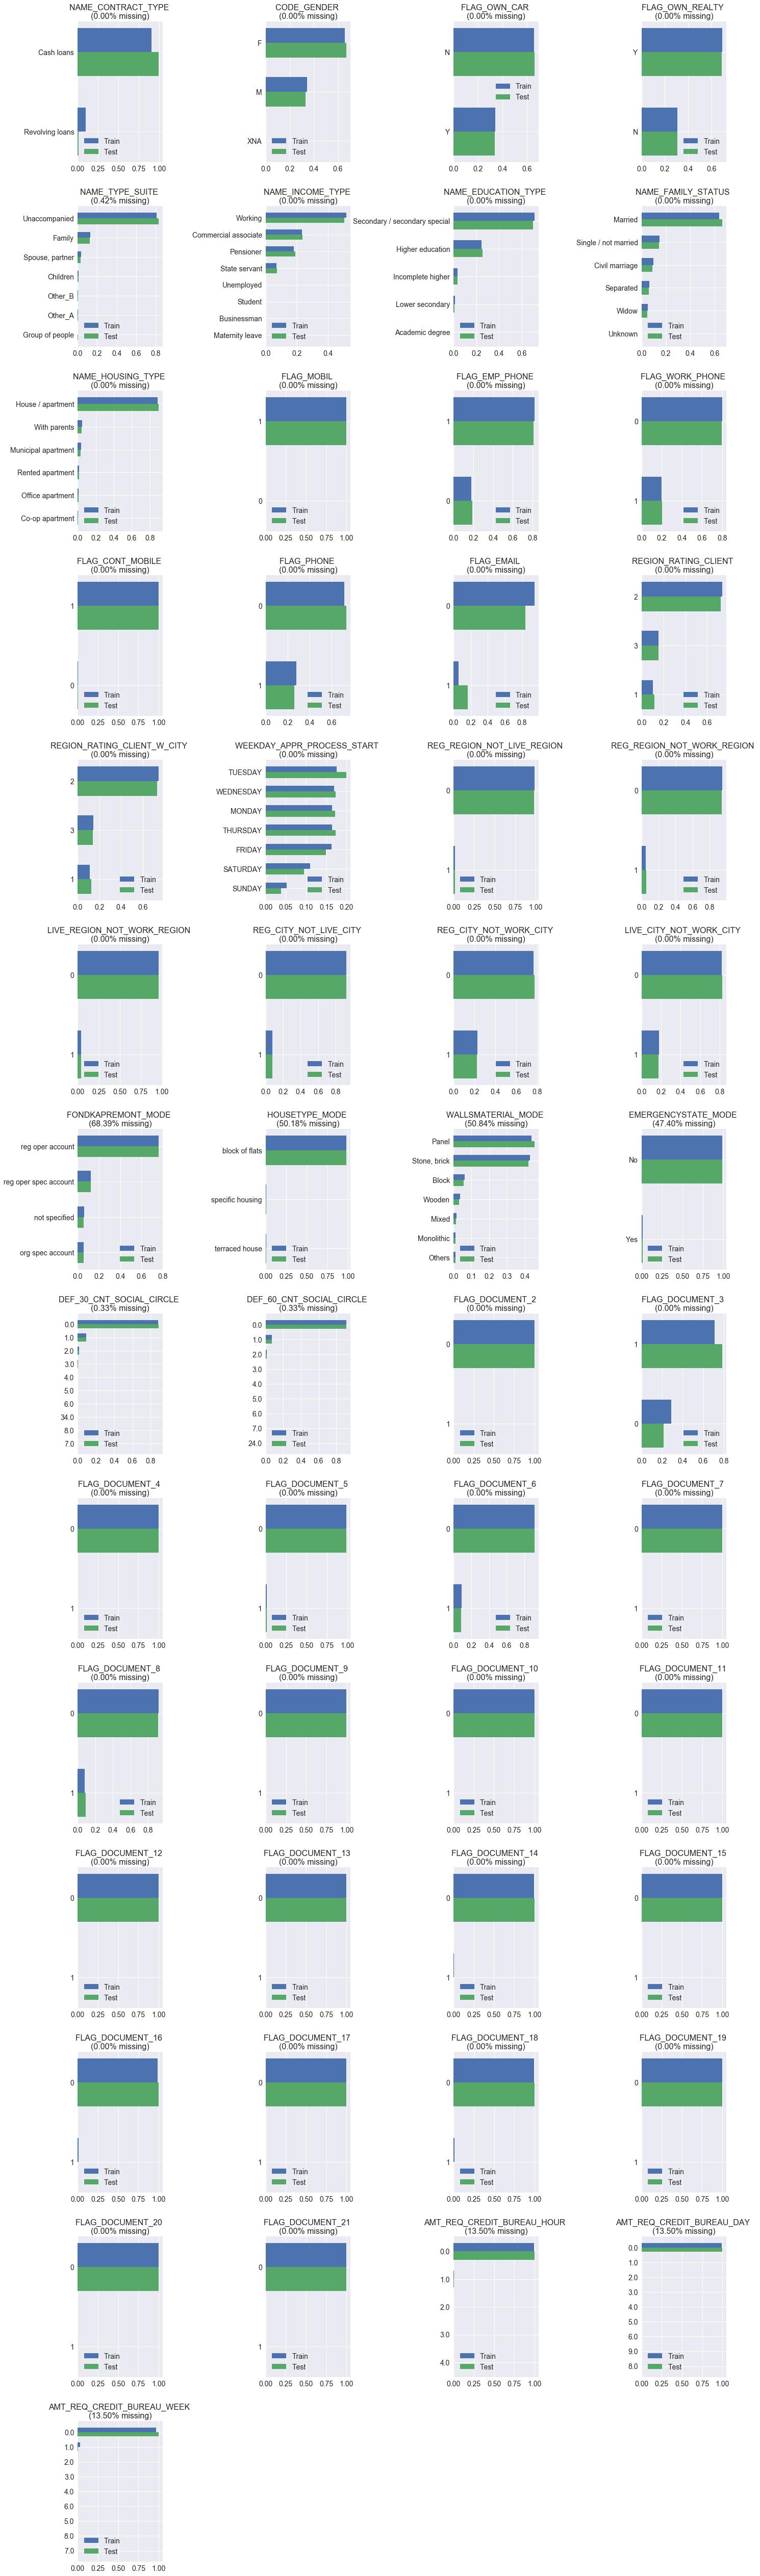

In [122]:
categorical_features = identify_category_columns(df_train, category_limit=10)
categorical_features.remove('TARGET')
#plot_barcharts_for_columns(df_train, categorical_features, ncols=4)
plot_barcharts_for_columns(df_train, cols=categorical_features, df2=df_test, normalized=True,
                           ncols=4, maxvals=20, minvals=1, labels=['Train','Test'])

#### Feature dists for target classes

In [95]:
df_train_success = df_train[df_train['TARGET']==0]
df_train_failure = df_train[df_train['TARGET']==1]

C:\Users\DAVOL\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\series.py:696: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


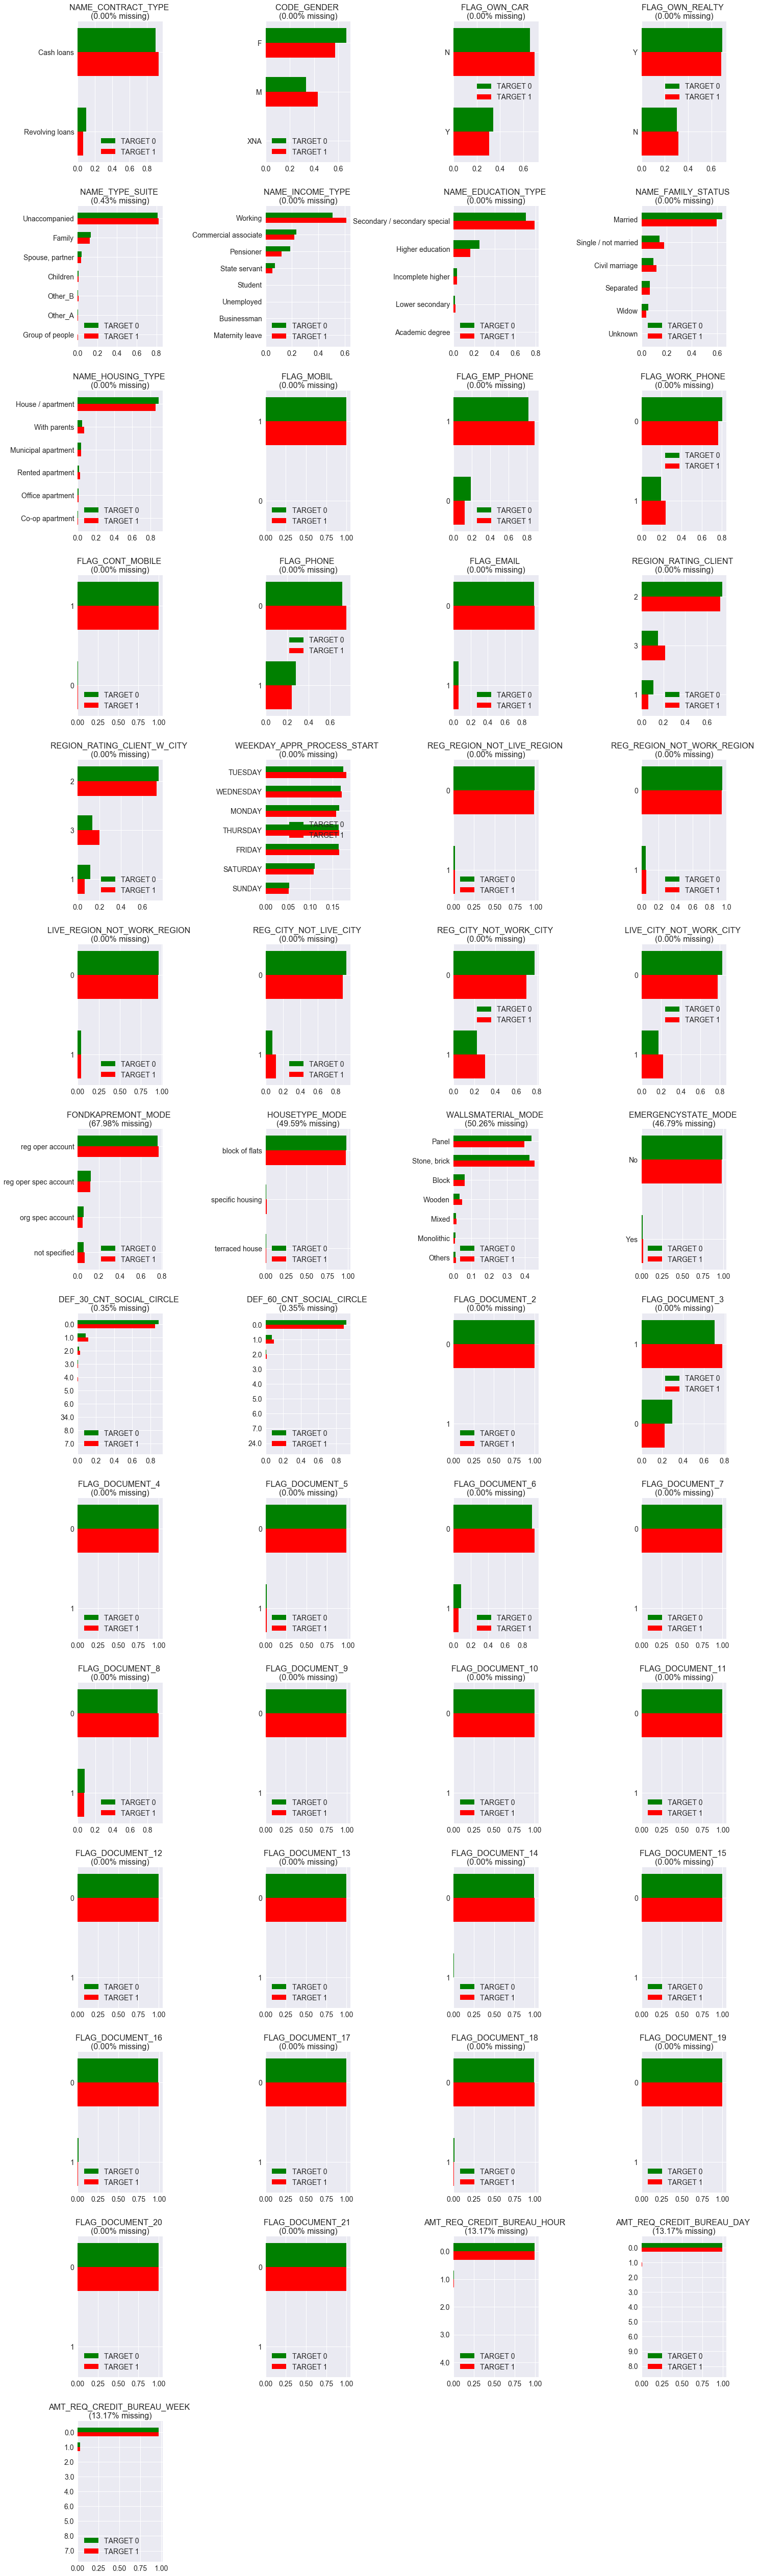

In [131]:
categorical_features = identify_category_columns(df_train, category_limit=10)
categorical_features.remove('TARGET')
#plot_barcharts_for_columns(df_train, categorical_features, ncols=4)
plot_barcharts_for_columns(df_train_success, cols=categorical_features, df2=df_train_failure, normalized=True,
                           ncols=4, maxvals=20, minvals=2, labels=['TARGET 0','TARGET 1'], colors=['green','red'])

C:\Users\DAVOL\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:838: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


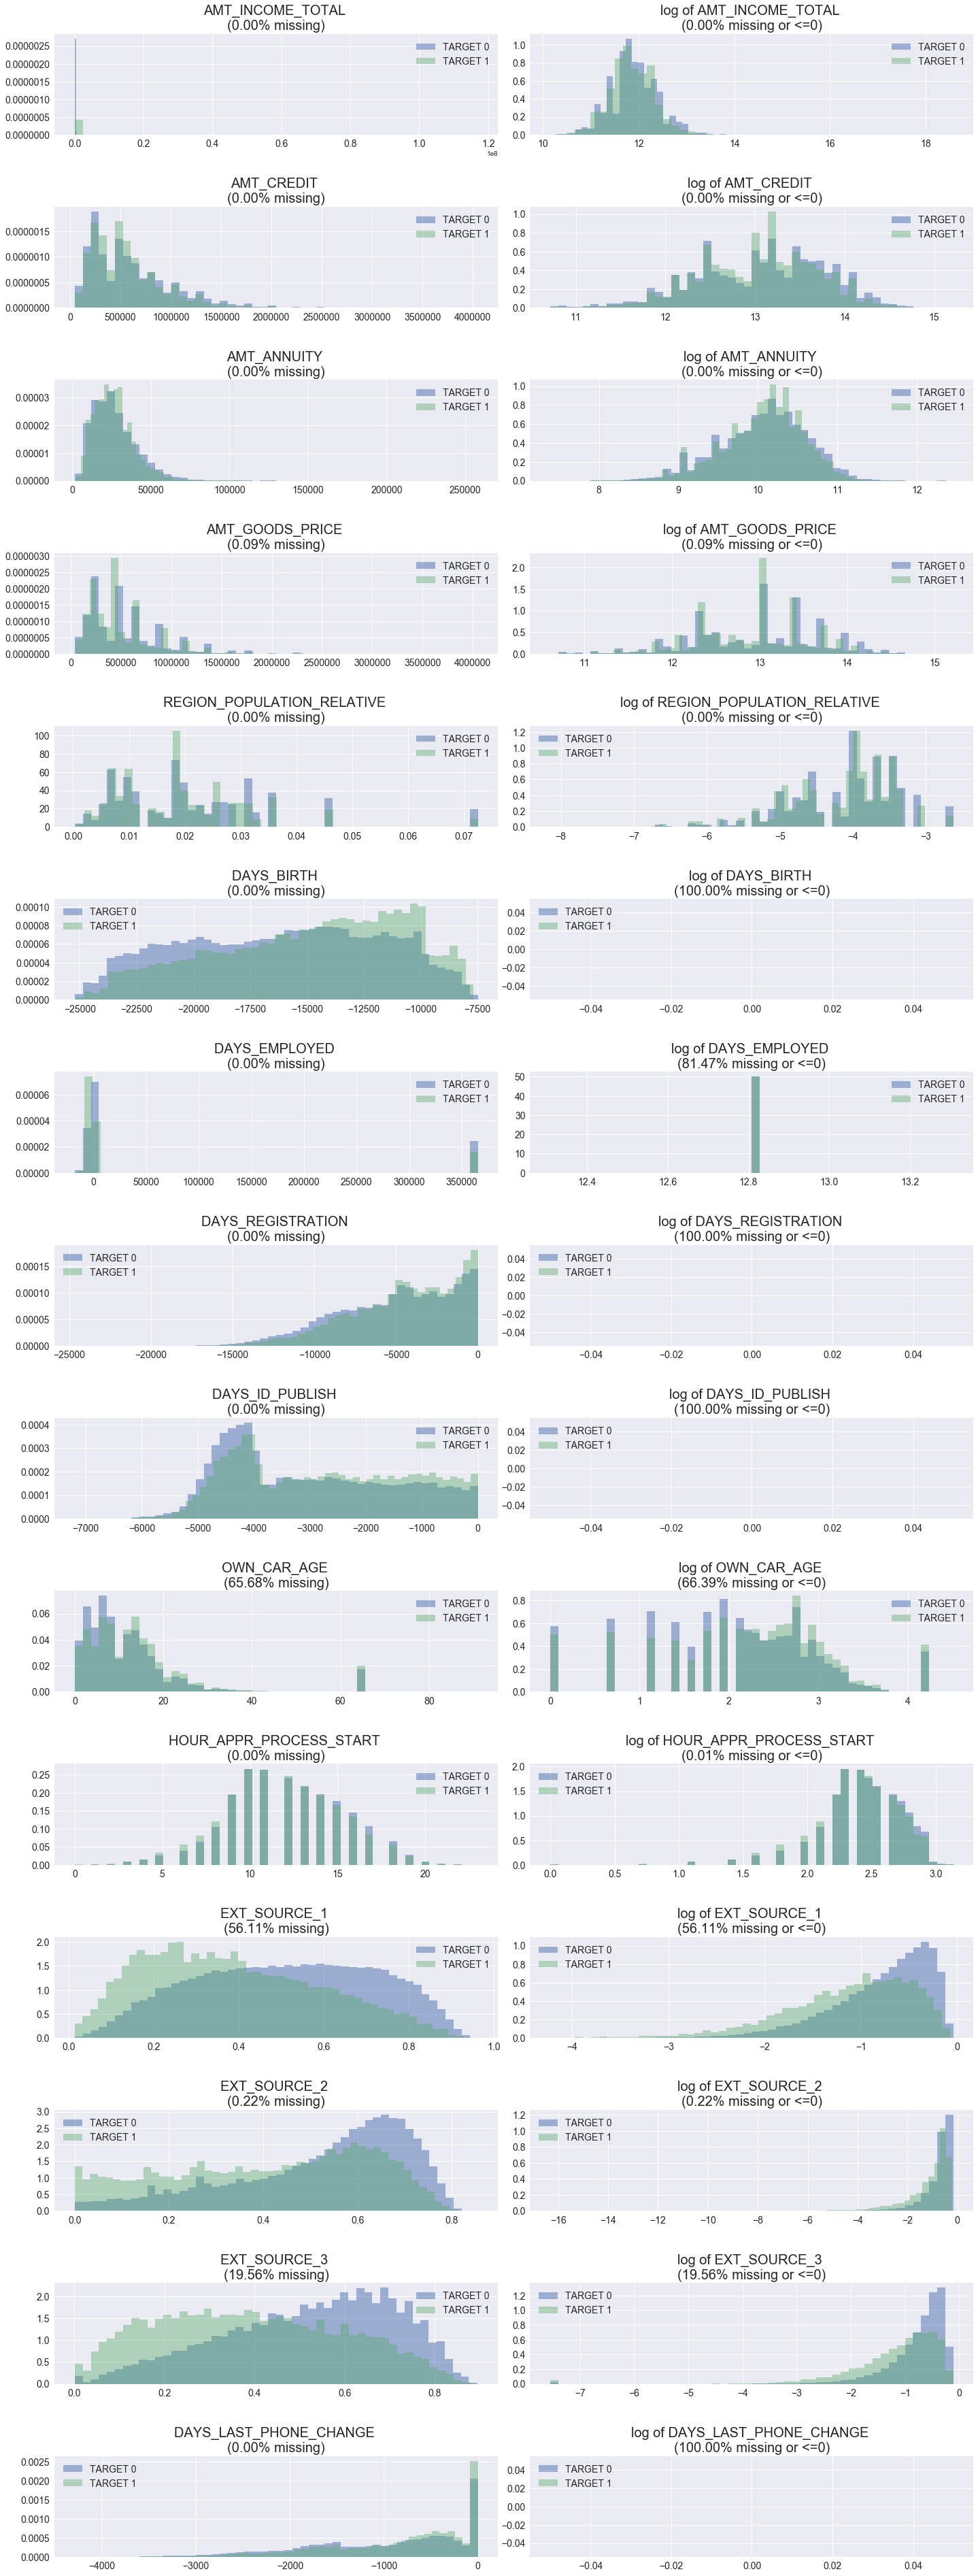

In [99]:
continuous_columns = ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE',
                     'REGION_POPULATION_RELATIVE','DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION',
                     'DAYS_ID_PUBLISH','OWN_CAR_AGE','HOUR_APPR_PROCESS_START',
                     'EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','DAYS_LAST_PHONE_CHANGE']
plot_histograms_for_columns(df_train_success, df2=df_train_failure, cols=continuous_columns, 
                            rowheight=3.5, labels=['TARGET 0','TARGET 1'])